In [357]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [358]:
df_house = pd.read_csv(".\data_zillow_house_prices.csv")
df_house

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31
0,102001,0,United States,country,NaN,127881.0,128227.0,128591.0,129332.0,130079.0,...,318303.0,322658.0,327381.0,332588.0,337848.0,343392.0,348415.0,352585.0,354986.0,356026.0
1,394913,1,"New York, NY",msa,NY,224676.0,226018.0,227226.0,229604.0,231817.0,...,573600.0,576842.0,580804.0,585445.0,591876.0,599008.0,606525.0,612535.0,616856.0,619142.0
2,753899,2,"Los Angeles, CA",msa,CA,227786.0,228579.0,229794.0,232104.0,234580.0,...,845860.0,855023.0,865646.0,877802.0,895038.0,914016.0,930381.0,931707.0,928599.0,914636.0
3,394463,3,"Chicago, IL",msa,IL,170004.0,170405.0,170924.0,171963.0,173064.0,...,288807.0,291527.0,294162.0,296729.0,300023.0,303490.0,307454.0,310438.0,312286.0,312609.0
4,394514,4,"Dallas, TX",msa,TX,129921.0,130025.0,130112.0,130323.0,130544.0,...,337274.0,343129.0,350514.0,358982.0,367040.0,376487.0,385149.0,392668.0,394861.0,393920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,753929,923,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,107811.0,110066.0,112647.0,115339.0,115955.0,116220.0,116214.0,117199.0,118364.0,119798.0
889,394743,924,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,341382.0,346968.0,352628.0,357313.0,357544.0,358017.0,359810.0,363289.0,366462.0,369645.0
890,753874,925,"Craig, CO",msa,CO,94670.0,95014.0,95596.0,96288.0,97002.0,...,244237.0,247636.0,250594.0,252962.0,253211.0,253361.0,254294.0,258151.0,262571.0,267315.0
891,394767,926,"Lamesa, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,93043.0,94667.0,96323.0,98574.0,99773.0,100829.0,101918.0,103465.0,105142.0,106274.0


In [359]:
df_rates = pd.read_csv(".\data_interest_rates.csv")
df_rates

,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29
...,...,...
2680,2022-08-11,5.22
2681,2022-08-18,5.13
2682,2022-08-25,5.55
2683,2022-09-01,5.66


In [360]:
boston_arr = (df_house[df_house["RegionName"] == "Boston, MA"]).squeeze()
boston_arr = boston_arr.iloc[6:]
boston_arr.index = pd.to_datetime(boston_arr.index)
boston_arr

2000-02-29    233010.0
2000-03-31    234265.0
2000-04-30    236467.0
2000-05-31    238657.0
2000-06-30    241004.0
                ...   
2022-04-30    643355.0
2022-05-31    651279.0
2022-06-30    656882.0
2022-07-31    658173.0
2022-08-31    657035.0
Name: 11, Length: 271, dtype: object

<Axes: >

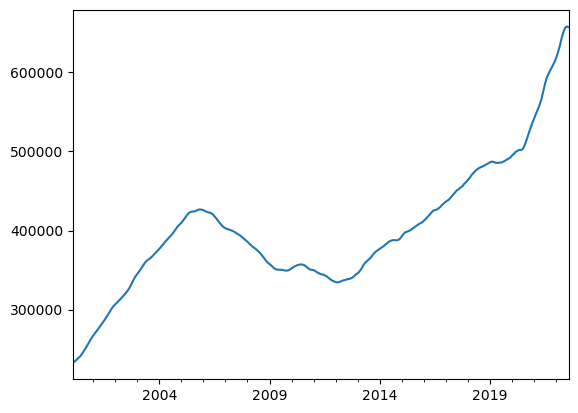

In [361]:
boston_arr.plot()

In [362]:
boston_slice = boston_arr["2010-01-01":"2017-12-31"]
boston_slice

2010-01-31    352001.0
2010-02-28    353713.0
2010-03-31    354899.0
2010-04-30    356066.0
2010-05-31    356716.0
                ...   
2017-08-31    452393.0
2017-09-30    454372.0
2017-10-31    455955.0
2017-11-30    459183.0
2017-12-31    461409.0
Name: 11, Length: 96, dtype: object

In [363]:
from statsmodels.tsa.stattools import adfuller
# Perform the ADF test
result = adfuller(boston_slice, regression="ct")

# Output the results
print('ADF Statistic:', result[0])
print('p-value:', np.round(result[1], 3))
print('Number of lags used:', result[2])
print('Number of observations used:', result[3])
print('Critical Values:', result[4])

ADF Statistic: -3.9032704282470565
p-value: 0.012
Number of lags used: 4
Number of observations used: 91
Critical Values: {'1%': -4.061865559807901, '5%': -3.4598875383872256, '10%': -3.155966861981154}


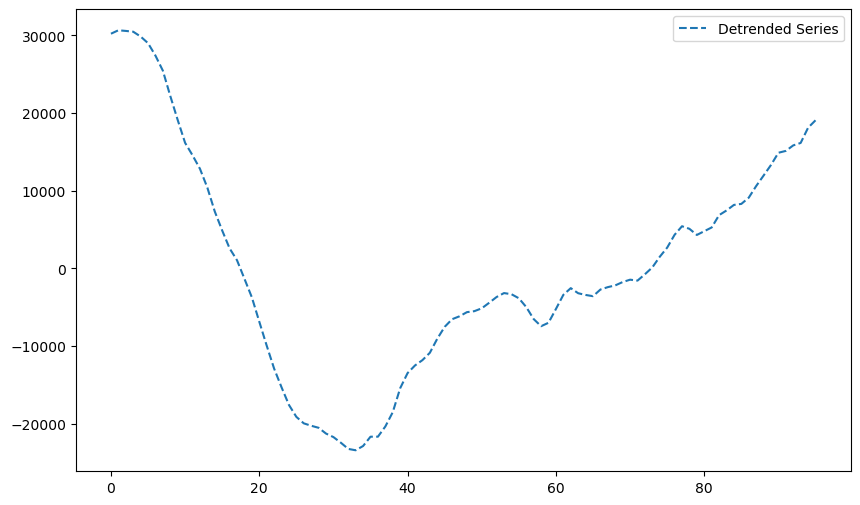

In [364]:
import scipy.signal
import matplotlib.pyplot as plt

# Remove linear trend using scipy's detrend function
detrended_series = scipy.signal.detrend(boston_slice)

# Plot the original and detrended series
plt.figure(figsize=(10,6))
# plt.plot(boston_slice, label='Original Series')
plt.plot(detrended_series, label='Detrended Series', linestyle='--')
plt.legend()
plt.show()

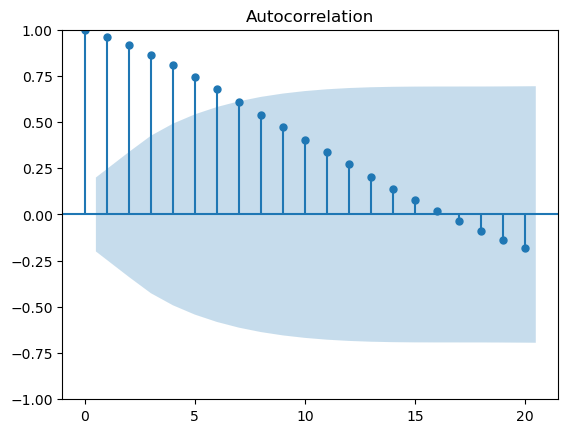

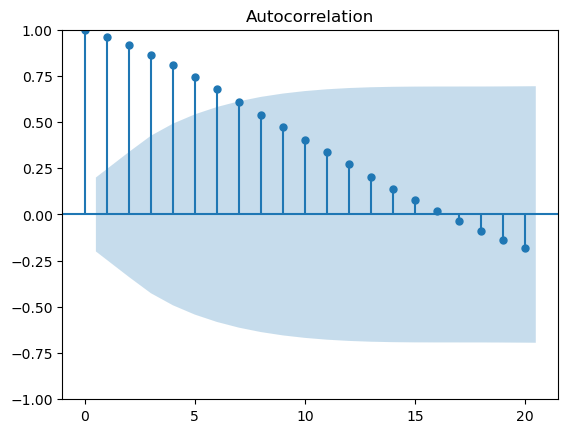

In [365]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(detrended_series)

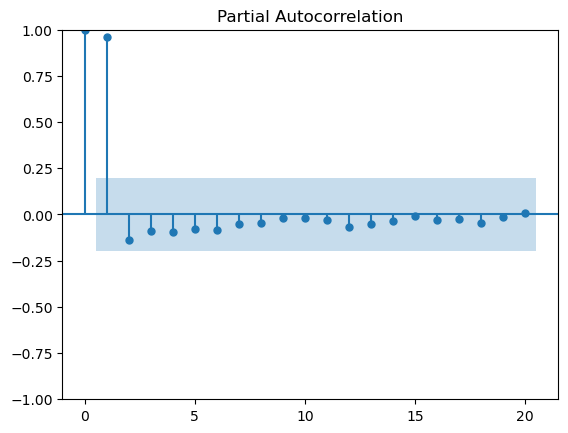

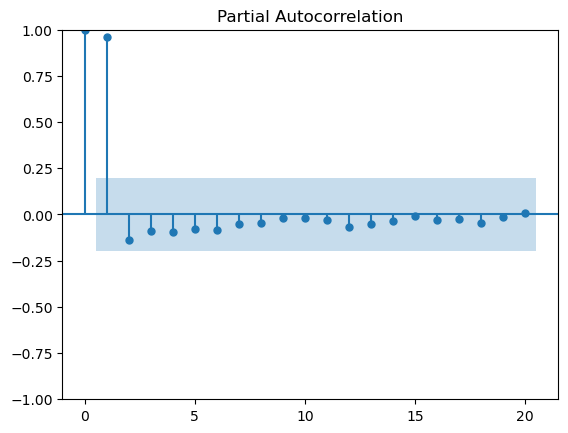

In [366]:
plot_pacf(detrended_series)

_______________

In [367]:
train = boston_slice.to_numpy()
train

array([352001.0, 353713.0, 354899.0, 356066.0, 356716.0, 357129.0,
       356795.0, 356125.0, 354136.0, 352315.0, 350636.0, 350304.0,
       349837.0, 348675.0, 346875.0, 345693.0, 344661.0, 344398.0,
       343288.0, 342164.0, 340304.0, 338485.0, 336798.0, 335661.0,
       334657.0, 334386.0, 334821.0, 335780.0, 336786.0, 337311.0,
       338127.0, 338671.0, 339142.0, 340236.0, 342055.0, 344523.0,
       345795.0, 348378.0, 351491.0, 355845.0, 359064.0, 361313.0,
       363265.0, 365480.0, 368559.0, 371360.0, 373611.0, 375259.0,
       377058.0, 378455.0, 380091.0, 382074.0, 384085.0, 385860.0,
       386985.0, 387732.0, 387864.0, 387590.0, 387939.0, 389653.0,
       392695.0, 395785.0, 397917.0, 398531.0, 399579.0, 400689.0,
       402814.0, 404393.0, 405885.0, 407586.0, 409159.0, 410308.0,
       412396.0, 414549.0, 417185.0, 419633.0, 422551.0, 424924.0,
       425863.0, 426340.0, 428093.0, 429842.0, 432699.0, 434567.0,
       436553.0, 437953.0, 440024.0, 442791.0, 445409.0, 44804

In [368]:
test = boston_arr["2018-01-01":"2019-12-31"]
test.head()

2018-01-31    464123.0
2018-02-28    466719.0
2018-03-31    470227.0
2018-04-30    472858.0
2018-05-31    475336.0
Name: 11, dtype: object

In [369]:
from statsmodels.tsa.ar_model import AutoReg

p = 5
res = AutoReg(train, lags=p, trend="ct").fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:                     AutoReg(5)   Log Likelihood                -701.831
Method:               Conditional MLE   S.D. of innovations            541.039
Date:                Sat, 19 Oct 2024   AIC                           1419.662
Time:                        14:15:17   BIC                           1439.749
Sample:                             5   HQIC                          1427.766
                                   96                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5781.6635   1465.892      3.944      0.000    2908.569    8654.759
trend         34.6587      7.480      4.634      0.000      19.999      49.318
y.L1           1.8215      0.092     19.776      0.000       1.641       2.002
y.L2          -0.7910      0.192     -4.125      0.000      -1.167      -0.415
y.L3          -0.6297      0.212     -2.969      0.003      -1.045      -0.214
y.L4           1.0506      0.195      5.377      0.000       0.668       1.434
y.L5          -0.4705      0.090     -5.256      0.000      -0.646      -0.295
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1897           -0.0000j            1.1897           -0.5000
AR.2            0.6261           -1.0560j            1.2277           -0.1648
AR.3            0.6261           +1.0560j            1.2277            0.1648
AR.4            1.0853           -0.0864j            1.0887           -0.0126
AR.5            1.0853           +0.0864j            1.0887            0.0126
-----------------------------------------------------------------------------
"""

p=1 : MSE=1.2

p=2 : MSE=0.4

p=3 : MSE=0.4

p=4 : MSE=0.4

p=4 : MSE=0.3

In [370]:
MSE_dict = {}
for p in [1, 2, 3, 4, 5]:
    res = AutoReg(train, lags=p, trend="ct").fit()
    MSE = (res.resid**2).sum() / len(train) / 10**6
    MSE_dict[p] = MSE

MSE_dict

{1: 1.1815135004442288,
 2: 0.38798065765301165,
 3: 0.3829012801332615,
 4: 0.3662614780241966,
 5: 0.27747759408851763}